In [24]:
import tensorflow as tf
import pathlib
import os
import shutil

import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Flatten, Softmax

Look at number of files in each folder

In [2]:
data_dir = '/home/jupyter/Medical_Image_Analysis/chest_xray/train/NORMAL'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*.jpeg')))
print(image_count)

1341


In [3]:
data_dir = '/home/jupyter/Medical_Image_Analysis/chest_xray/train/PNEUMONIA'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*.jpeg')))
print(image_count)

3875


Load data using keras.preprocessing library

In [4]:
batch_size= 32
img_height = 180
img_width = 180

In [6]:
data_dir='/home/jupyter//Medical_Image_Analysis/chest_xray/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5217 files belonging to 2 classes.
Using 4174 files for training.


In [7]:
validation_data_dir='/home/jupyter/chest_xray/val'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5217 files belonging to 2 classes.
Using 1043 files for validation.


Visualize the data

In [9]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


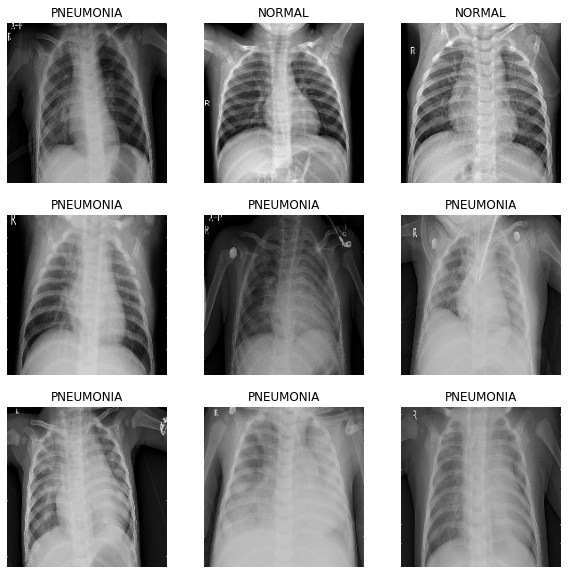

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Define the model and train

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
num_classes = 2

model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        Flatten(),
        Dense(num_classes),
        Softmax()
    ])

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']) #since the last layer is a softmax we can only measure accuracy

Epoch 1/20
131/131 [==============================] - 1s 6ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 2/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 3/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 4/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 5/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 6/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 7/20
131/131 [==============================] - 1s 5ms/step - loss: 0.5787 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7766
Epoch 

<AxesSubplot:>

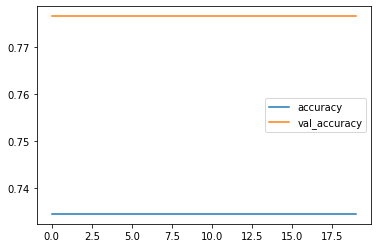

In [23]:

MODEL_DIR = os.path.join("./image_models", 'linear')
shutil.rmtree(MODEL_DIR, ignore_errors=True)

linear_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[TensorBoard(MODEL_DIR)]
)

pd.DataFrame(linear_history.history)[['accuracy', 'val_accuracy']].plot()